# Tarea 1.3 - Algoritmo de Canny

Algoritmo:
1. Suavizar: Desenfoque de la imagen para eliminar el ruido.
2. Encontrar gradientes: los bordes deben estar marcados en los gradientes de la imagen que tiene magnitudes grandes.
3. No supresión máxima: Sólo los máximos locales se debe marcar como bordes.
4. Umbralización doble: Los posibles bordes deben estár determinados por umbralización.
5. Seguimiento por histéresis: Los bordes finales se determinan mediante la supresión de todas las aristas que no están conectados a una muy determinada borde (fuerte).

In [138]:
# importacion de las librerias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

[[231 237 246 ... 222 222 221]
 [230 239 249 ... 221 221 218]
 [228 240 251 ... 219 221 217]
 ...
 [ 23  26  25 ...  69  77  78]
 [ 34  35  35 ...  51  54  54]
 [ 41  41  41 ...  41  41  41]]


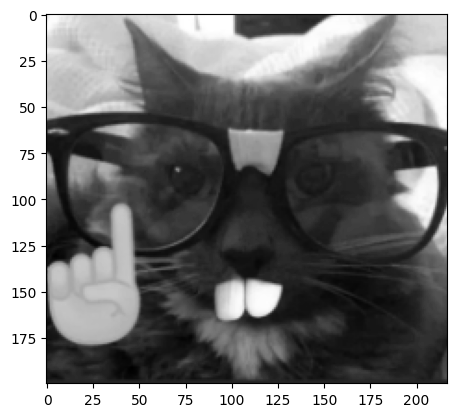

In [139]:
# 1. Suavizar la imagen para eliminar el ruido

# para esto se aplica un filtro gausssiano de 5x5
foto = 'prueba.png'
# se carga la imagen
imag = cv2.imread(foto,0)   # se lee la imagen en BGR
#imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)   # convierte la imagen a RGB
plt.imshow(imag,cmap="gray")   # muestra la imagen
filas, columnas = imag.shape

matImg = np.array(imag)

gauss = np.array([[2, 4, 5, 4, 2],
                  [4, 9, 12, 9, 4],
                  [5, 12, 15, 12, 5],
                  [4, 9, 12, 9, 4],
                  [2, 4, 5, 4, 2]])

print(matImg)

In [140]:
# se realiza el proceso de convolucion
def convolucion(matriz_imagen, kernel):
     convolucion = np.zeros((filas, columnas))

     for x in range(filas):
          for y in range(columnas):
               for x2 in range(len(kernel)):
                    for y2 in range(len(kernel[0])):
                         if(len(kernel[0]) == 5):
                              if(x>2 and x<filas-2 and y>2 and y<columnas-2):
                                   convolucion[x,y] += (kernel[x2,y2] * matriz_imagen[x-2+x2,y-2+y2])
                         if(len(kernel[0]) == 3):     
                              if(x>1 and x<filas-1 and y>1 and y<columnas-1):
                                   convolucion[x,y] += (kernel[x2,y2] * matriz_imagen[x-1+x2,y-1+y2])
     return convolucion

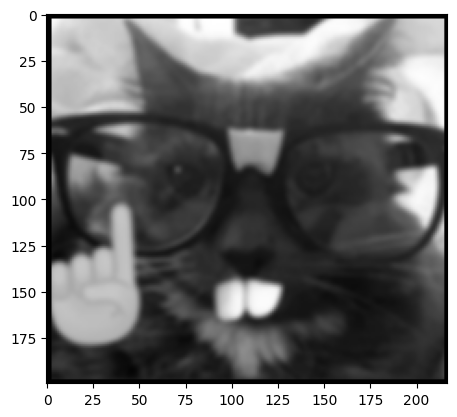

In [141]:
matGauss = convolucion(imag, gauss)
matGauss = cv2.normalize(matGauss, None, 0, 255, cv2.NORM_MINMAX)

# Crea una imagen RGB desde la matriz tridimensional
imgGauss= Image.fromarray(matGauss)
plt.imshow(imgGauss,cmap="gray")

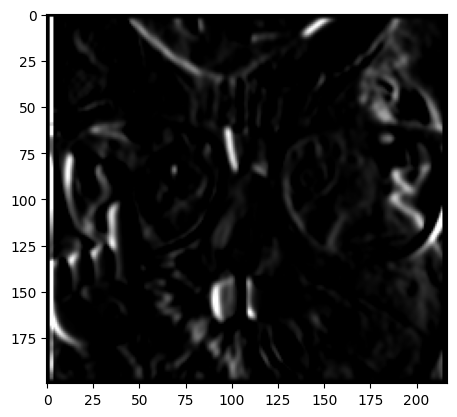

In [142]:
# 2. Encontrar gradientes de la imagen para detectar los bordes
matGauss = np.float64(matGauss)

sobelX = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

matSobelX = convolucion(matGauss, sobelX)
#matSobelX = unionCanales(rojoSX,verdeSX,azulSX,1)
imgSobelX = Image.fromarray(matSobelX)
plt.imshow(imgSobelX)

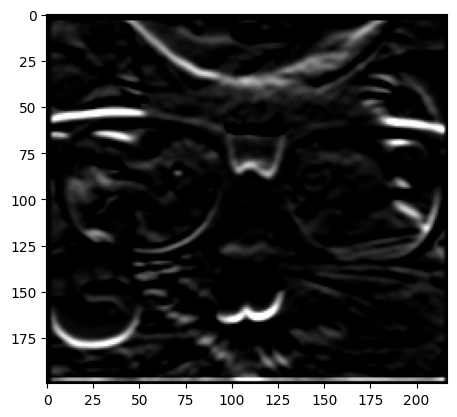

In [143]:
sobelY = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]])
matSobelY = convolucion(matGauss, sobelY)
#matSobelY = unionCanales(rojoSY,verdeSY,azulSY,1)
imgSobelY = Image.fromarray(matSobelY)
plt.imshow(imgSobelY)

In [144]:
def magnitudGradiente(derivadaX, derivadaY):
    gm = (derivadaX ** 2 + derivadaY ** 2) ** 0.5
    return gm

def direccionGradiente(derivadaX, derivadaY):
    gd = np.rad2deg(np.arctan2(derivadaY, derivadaX))
    return gd


In [145]:
matGm = magnitudGradiente(matSobelX,matSobelY)
matGd = magnitudGradiente(matSobelX,matSobelY)



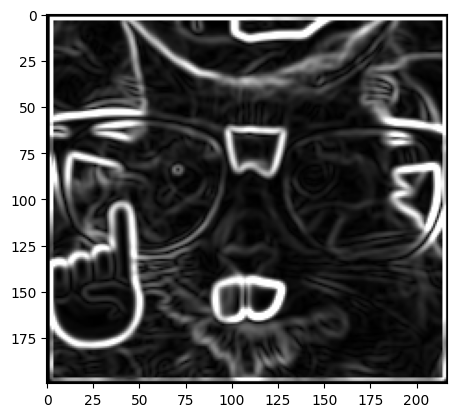

In [146]:
#matGm = unionCanales(gmRojoX, gmVerdeX, gmAzulX, 1)
imgGm = Image.fromarray(matGm)
plt.imshow(imgGm)

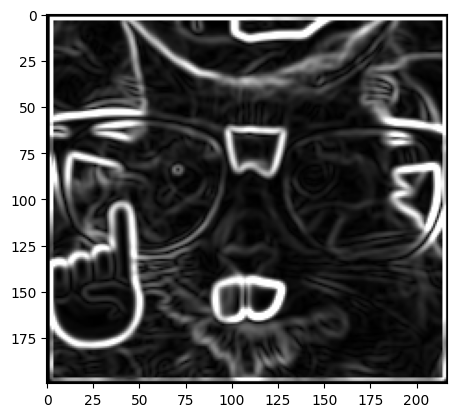

In [147]:
#matGd = unionCanales(gmRojoY, gmVerdeY, gmAzulY, 1)
imgGd = Image.fromarray(matGd)
plt.imshow(imgGd)